#  SCRAPING

In [138]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

books = []  # <-- move this here

for i in range(1, 51):
    url = f"https://books.toscrape.com/catalogue/page-{i}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text.replace("Â£", "")
        rating = book.p["class"][1]  # e.g. "Three"

        books.append([title, price, rating])

df = pd.DataFrame(books, columns=["title", "price", "rating"])
df.head()


,title,price,rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five


### Dataset Result

In [139]:
df

,title,price,rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five
998,1st to Die (Women's Murder Club #1),53.98,One


# CLEANING

### Type Conversion

In [140]:
df["price"] = df["price"].astype(float)


In [141]:
rating_map = {
    "One": 1, "Two": 2, "Three": 3,
    "Four": 4, "Five": 5
}

df["rating"] = df["rating"].map(rating_map)


### No Missing Values



In [142]:

df.isnull().sum()

title     0
price     0
rating    0
dtype: int64

## Final Dataset



In [143]:
df



,title,price,rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,1st to Die (Women's Murder Club #1),53.98,1


## Statistics



In [144]:
df.describe()


,price,rating
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


In [145]:
print(df.groupby("rating")["price"].mean())




rating
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: price, dtype: float64


# MODELING



##  Preparring Data



In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
X = df[["rating"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print('finish')


finish



## Model Trainning


In [147]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False



## Model evaluation


In [148]:
preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))


MAE: 12.657940058577998


In [150]:
for y_true, y_pred in zip(y_test, preds):
    if abs( y_true-y_pred)<5 :
        print(y_true, " || ", y_pred)


33.92  ||  35.314668619266584
36.17  ||  34.95460963838387
33.26  ||  34.95460963838387
34.13  ||  36.034786581032016
38.43  ||  36.034786581032016
39.61  ||  36.034786581032016
38.13  ||  36.034786581032016
35.96  ||  35.674727600149296
35.61  ||  35.314668619266584
31.85  ||  35.314668619266584
34.74  ||  35.674727600149296
33.23  ||  34.59455065750115
34.77  ||  34.59455065750115
33.63  ||  34.95460963838387
37.13  ||  34.59455065750115
39.24  ||  34.59455065750115
30.54  ||  34.59455065750115
34.06  ||  35.314668619266584
30.81  ||  34.59455065750115
32.24  ||  36.034786581032016
36.52  ||  34.95460963838387
34.96  ||  35.674727600149296
30.66  ||  35.314668619266584
38.16  ||  35.674727600149296
31.22  ||  34.95460963838387
38.71  ||  35.314668619266584
34.79  ||  34.95460963838387
33.26  ||  34.95460963838387
37.97  ||  34.95460963838387
39.07  ||  36.034786581032016
39.43  ||  34.59455065750115
38.95  ||  35.314668619266584
35.28  ||  35.314668619266584
38.62  ||  34.59455065750

In [151]:
preds = model.predict([[2]])
preds[0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(34.95460963838387)

# VISUALIZATION

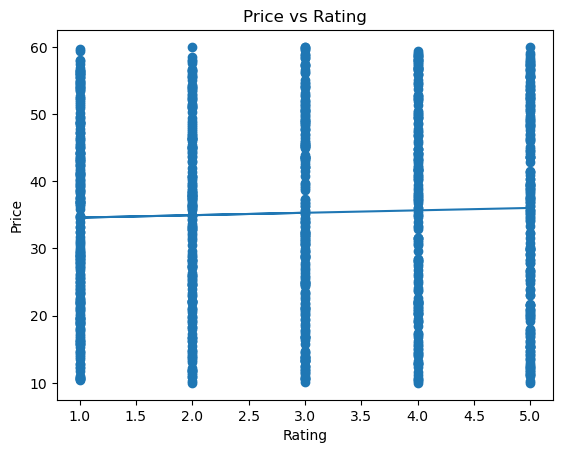

In [152]:
import matplotlib.pyplot as plt

plt.scatter(df["rating"], df["price"])
plt.plot(df["rating"], model.predict(df[["rating"]]))
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Price vs Rating")
plt.show()
